In [1]:
%run "docker_extract.py"
# import sys
# sys.path.insert(0, ".")

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipynb.fs.full.docker_extract import ExtractData 
from ipynb.fs.full.compute_statistics import Transformation 
# from docker_extract import ExtractData


parent_dir=os.path.dirname(os.getcwd())
data_extractor=ExtractData()
df=pd.read_csv(os.path.join(parent_dir,"test_dataframe.csv"),index_col=0)
old_cols=df.columns
df.dropna(how='all', axis=1, inplace=True)
df.drop(["match_id.1","has_stats"],axis=1,inplace=True)
df=df[df['outcome'] != "RET"]
df=df[(~df['surface'].isna()) | (~df['indoor'].isna())]
df.sort_values(by="date",inplace=True)


In [2]:
import numpy as np

print(df.shape)
data_trans = Transformation(df)
data_trans()
new_df=data_trans.get_dataframe()
print(new_df.shape)
# print(new_df.shape)
# new_df.drop(['w_1st_in','l_1st_in','w_sv_gm_lset','l_sv_gm_lset','w_ace_set','l_ace_set','w_df_set','l_df_set','w_r_gm_w_set','l_r_gm_w_set','w_bp_set','l_bp_set','w_bpf_set','l_bpf_set'],axis=1,inplace=True)
# new_df=new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
# new_df.dropna(inplace=True)
# new_df.sort_values(by=['date','match_id']).to_csv('stats_df.csv')
# display(new_df)

#sv is service--> Bal slaan
#sf is surface

(69594, 57)
(69300, 68)


In [3]:
display(new_df)

,match_id,l_sf_elo,l_i_o_elo_rank,w_sf_elo,w_i_o_elo_rank,winner_id,loser_id,w_rank,l_rank,w_elo_r,...,w_r_game_w,l_r_game_w,w_gm_w,l_gm_w,w_g_dominance,l_g_dominance,w_br_ratio,l_br_ratio,w_win_p,l_win_p
0,80931,2367.0,2367.0,1868.0,1868.0,1723,1414,56.0,2.0,1868.0,...,0.125000,0.133333,0.483871,0.516129,0.937500,1.066667,0.500000,2.000000,0.053531,0.946469
1,80965,1796.0,1796.0,1903.0,1903.0,1439,857,70.0,263.0,1903.0,...,0.461538,0.357143,0.555556,0.444444,1.292308,0.773810,1.320000,0.757576,0.649295,0.350705
2,80966,1730.0,1730.0,1899.0,1899.0,1735,1955,32.0,103.0,1899.0,...,0.600000,0.300000,0.650000,0.350000,2.000000,0.500000,1.230769,0.812500,0.725686,0.274314
3,80967,1800.0,1800.0,1864.0,1864.0,1119,1532,83.0,90.0,1864.0,...,0.444444,0.200000,0.631579,0.315789,2.222222,0.450000,3.250000,0.307692,0.591076,0.408924
4,80968,1707.0,1707.0,1913.0,1913.0,752,1601,79.0,213.0,1913.0,...,0.500000,0.428571,0.535714,0.464286,1.166667,0.857143,0.583333,1.714286,0.765995,0.234005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69589,177392,2159.0,2125.0,2363.0,2217.0,4742,26577,2.0,6.0,2404.0,...,0.285714,0.142857,0.571429,0.428571,2.000000,0.500000,0.750000,1.333333,0.806528,0.193472
69590,177393,2204.0,2143.0,2363.0,2217.0,4742,25897,2.0,8.0,2399.0,...,0.222222,0.000000,0.631579,0.368421,0.000000,0.000000,0.400000,2.500000,0.771114,0.228886
69591,177396,2204.0,2143.0,2159.0,2125.0,26577,25897,6.0,8.0,2153.0,...,0.142857,0.066667,0.551724,0.448276,2.142857,0.466667,0.222222,4.500000,0.451226,0.548774
69592,177394,2159.0,2125.0,2273.0,2139.0,6219,26577,3.0,6.0,2222.0,...,0.066667,0.062500,0.516129,0.483871,1.066667,0.937500,0.750000,1.333333,0.581301,0.418699


In [ ]:
for column in new_df.columns:
    print(column)
    print(new_df[column].describe())
    print()

match_id
count     34371.000000
mean     126926.141049
std       28551.335463
min       80994.000000
25%      102646.500000
50%      122815.000000
75%      152677.500000
max      180760.000000
Name: match_id, dtype: float64

l_sf_elo
count    34371.000000
mean      1933.094411
std        127.502848
min       1504.000000
25%       1846.000000
50%       1921.000000
75%       2006.000000
max       2670.000000
Name: l_sf_elo, dtype: float64

l_i_o_elo_rank
count    34371.000000
mean      1919.886096
std        119.608637
min       1502.000000
25%       1835.000000
50%       1907.000000
75%       1989.000000
max       2605.000000
Name: l_i_o_elo_rank, dtype: float64

w_sf_elo
count    34371.000000
mean      1998.979023
std        154.524230
min       1514.000000
25%       1890.000000
50%       1980.000000
75%       2085.000000
max       2666.000000
Name: w_sf_elo, dtype: float64

w_i_o_elo_rank
count    34371.000000
mean      1980.514678
std        144.961367
min       1502.000000
25%      

/var/folders/f0/w2rx57_n78d55m07x7v_fsr40000gn/T/ipykernel_56008/3190524430.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(new_df[column].describe())


count    34371.000000
mean         0.651164
std          0.279383
min          0.000000
25%          0.500000
50%          0.666667
75%          0.846154
max          1.000000
Name: w_bp_save, dtype: float64

l_bp_save
count    34371.000000
mean         0.498644
std          0.197884
min          0.000000
25%          0.400000
50%          0.500000
75%          0.636364
max          1.000000
Name: l_bp_save, dtype: float64

w_r_1st_w
count    34371.000000
mean         0.348005
std          0.097931
min          0.000000
25%          0.280000
50%          0.344828
75%          0.410714
max          0.944444
Name: w_r_1st_w, dtype: float64

l_r_1st_w
count    34371.000000
mean         0.249107
std          0.081535
min          0.000000
25%          0.193548
50%          0.250000
75%          0.305085
max          0.727273
Name: l_r_1st_w, dtype: float64

w_bp_w
count    34371.000000
mean         0.501356
std          0.197884
min          0.000000
25%          0.363636
50%          0.50

In [ ]:
print(new_df[new_df['w_br_ratio'].isna()][['w_br_ratio',]])
print(new_df.isna().sum().sort_values())

Empty DataFrame
Columns: [w_br_ratio]
Index: []
match_id       0
w_df_game      0
l_df_game      0
w_df_2nd_sv    0
l_df_2nd_sv    0
              ..
w_1st_w        0
l_sv_w         0
w_sv_w         0
w_bp_save      0
l_win_p        0
Length: 68, dtype: int64


<AxesSubplot:>

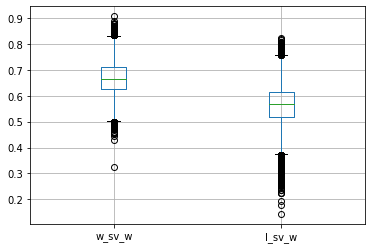

In [ ]:
new_df.boxplot(['w_sv_w','l_sv_w'])

In [5]:
data_extractor.get_match_details(121226)

,outcome,match_id,date,first_name,last_name,first_name,last_name
0,None,121226,2002-06-10,Jeff,Morrison,Andrew,Ilie


In [ ]:
import researchpy as rp

def ttest(column):
    return rp.ttest(group1=new_df["w"+column], group1_name= "Winner",
                    group2=new_df["l"+column], group2_name= "Loser")

In [ ]:
columns=[column[1:] for column in new_df.columns if "w_" in column]

ttest_df=pd.DataFrame([])

for column in columns:
    data=[column[1:]]
    result=ttest(column)
    data.append(str(int(result[0]['N'][0])))
    data.append(str(round(result[0]['Mean'][0],2)))
    data.append(str(round(result[0]['Mean'][1],2)))
    data.append(str(round(result[1].iloc[0][1],2)))
    data.append(str(result[1].iloc[4][1]))
    data.append(str(result[1].iloc[5][1]))
    ttest_df=ttest_df.append(pd.Series(data),ignore_index=True)

ttest_df.columns=['Variable','N','Mean Winner','Mean Loser','Difference','Dif. < 0 p value','Dif. > 0 p value']
display(ttest_df)





/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:19: RuntimeWarning: invalid value encountered in double_scalars
  groups_diff = numpy.mean(group1) - numpy.mean(group2)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:5681: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:36: RuntimeWarning: invalid value encountered in double_scalars
  d = (group1.mean() - group2.mean()) / numpy.sqrt(((group1.count() - 1) * group1.std()**2 + (group2.count() - 1) * group2.std()**2) / (group1.count() + group2.count() - 2))
/usr/local/lib/python3.9/site-packages/researchpy/ttest.py:40: RuntimeWarning: invalid value encountered in double_scalars
  cles = 0 - abs(group1.mean() - group2.mean()) / numpy.sqrt(group1.var() + group2.var())
/usr/local/l

,Variable,N,Mean Winner,Mean Loser,Difference,Dif. < 0 p value,Dif. > 0 p value
0,sf_elo,34371,1998.98,1933.09,65.88,1.0,0.0
1,i_o_elo_rank,34371,1980.51,1919.89,60.63,1.0,0.0
2,rank,34371,48.08,64.14,-16.06,0.0,1.0
3,elo_r,34371,1987.89,1929.76,58.13,1.0,0.0
4,ace,34371,0.08,0.05,0.02,1.0,0.0
5,df,34371,0.04,0.05,-0.01,0.0,1.0
6,tt_p,34371,0.55,0.45,0.1,1.0,0.0
7,sv_w,34371,0.67,0.56,0.1,1.0,0.0
8,1st_w,34371,0.75,0.65,0.1,1.0,0.0
9,2nd_w,34371,0.55,0.45,0.1,1.0,0.0


In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
from tqdm import tqdm
def ch_calculate(df):
    factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

    chi2, p_values =[], []

    for f in tqdm(factors_paired):
        if f[0] != f[1]:
            chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)

    chi2 = np.array(chi2).reshape((len(df.columns),len(df.columns))) # shape it as a matrix
    chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values) # then a df for convenience
    return chi2
    

chi_square=ch_calculate(new_df[[i for i in new_df.columns if "w_" in i]])

  0%|          | 3/1024 [00:00<02:58,  5.72it/s]


KeyboardInterrupt: 

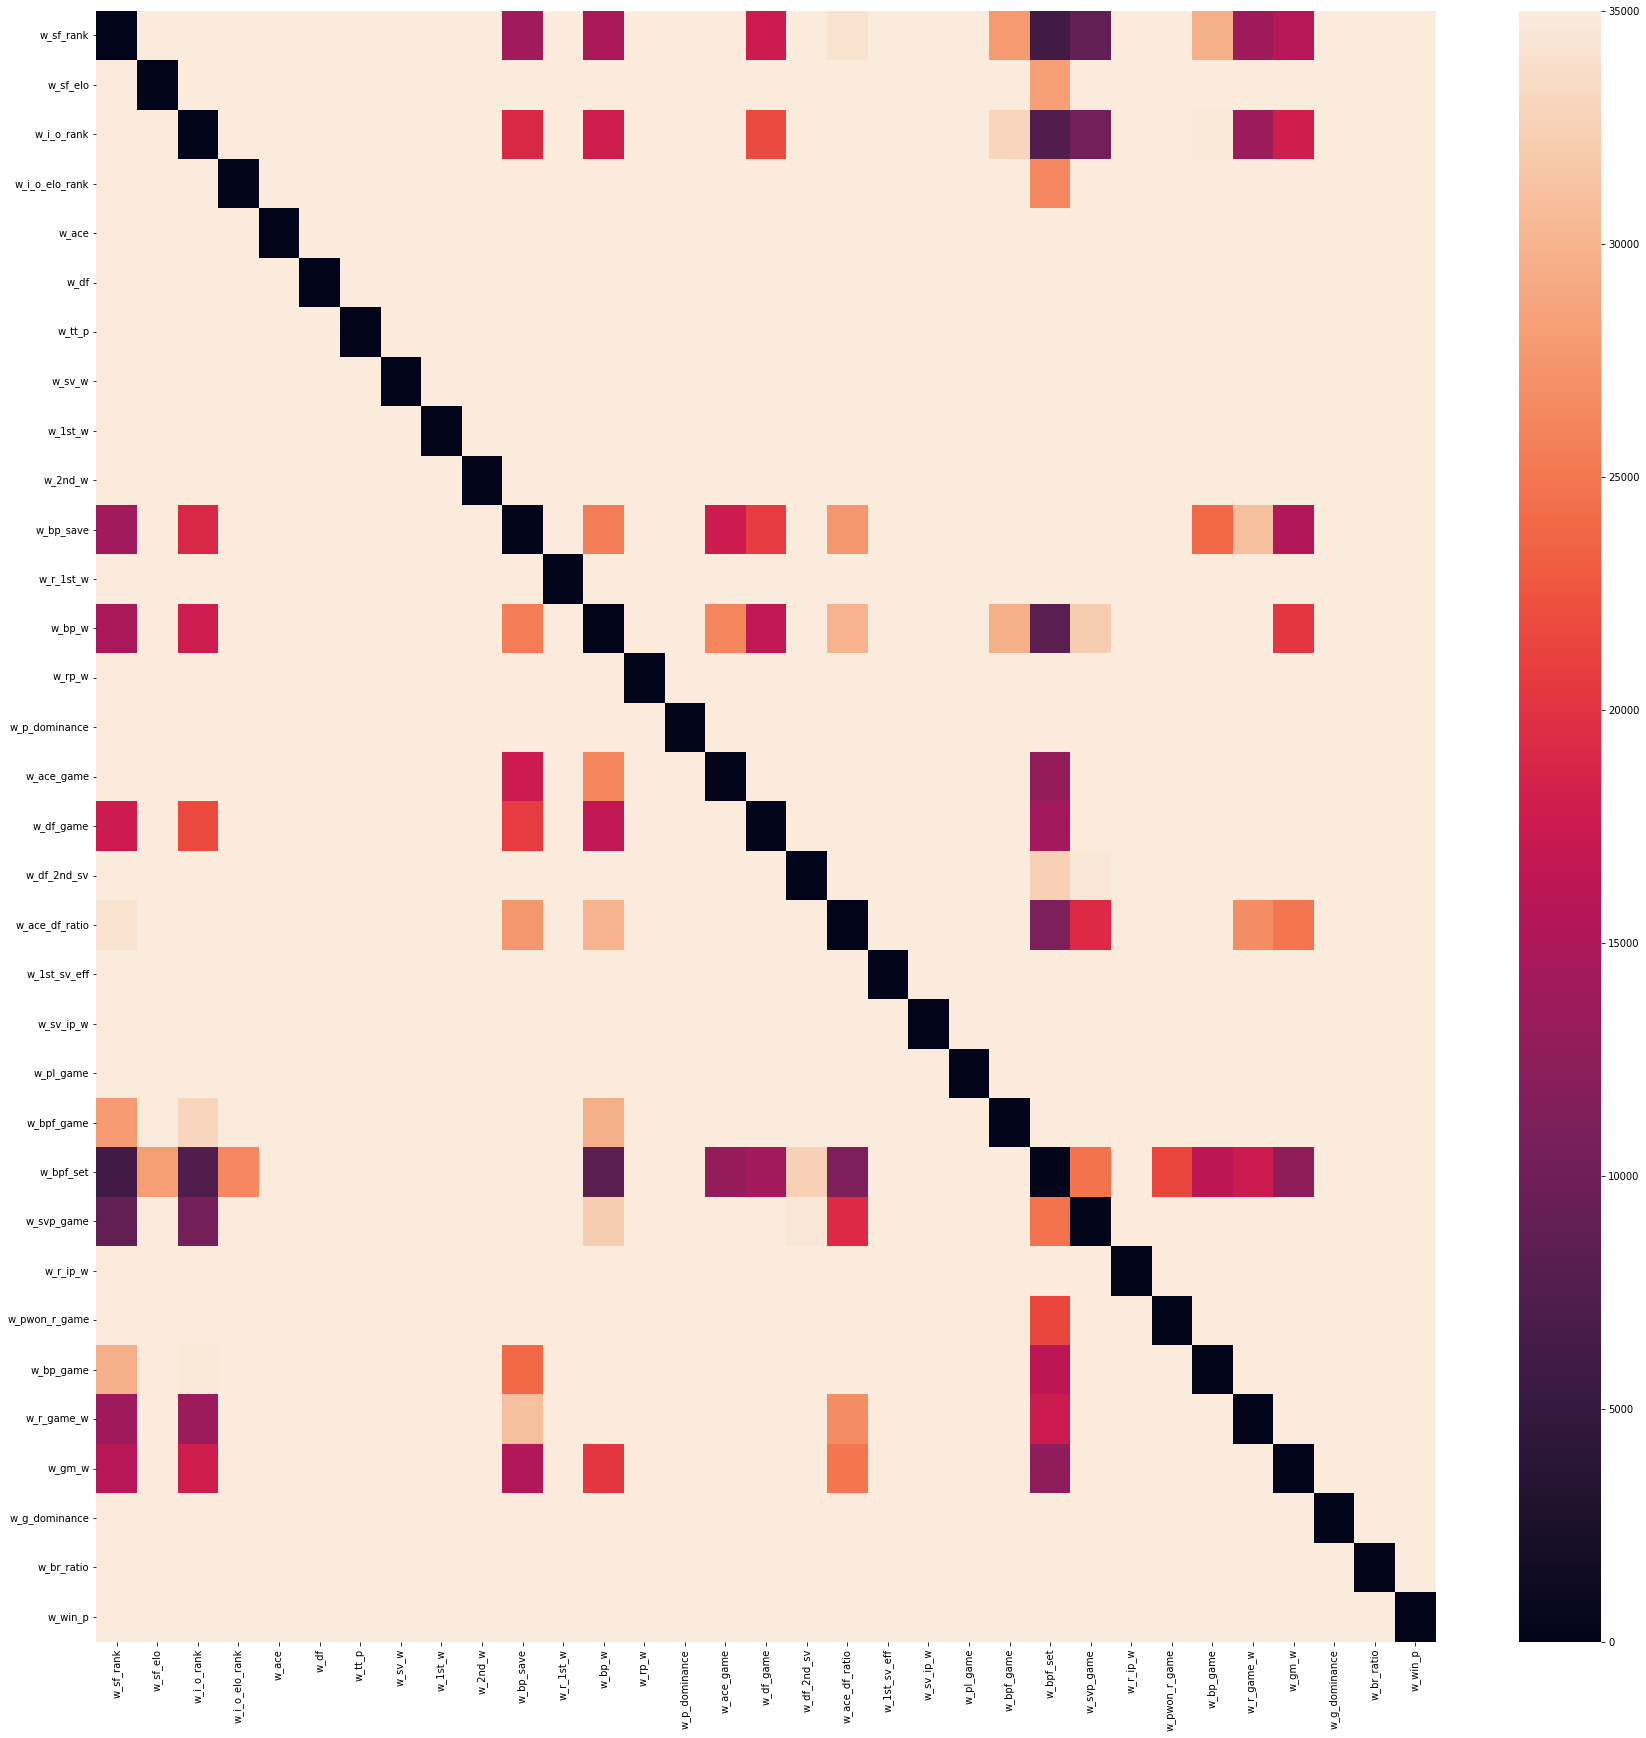

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(chi_square,vmin=0, vmax=35000)
plt.show()